In [9]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
#GLRAM core code
def update_L(A_list, R, k):
    """Update L given R."""
    ML = np.sum([Ai @ R @ R.T @ Ai.T for Ai in A_list], axis=0)
    eigenvalues, eigenvectors = np.linalg.eig(ML)
    # 取最大的k个特征值对应的特征向量
    idx = np.argsort(eigenvalues)[-k:][::-1]
    return eigenvectors[:, idx]

def update_R(A_list, L, k):
    """Update R given L."""
    MR = np.sum([Ai.T @ L @ L.T @ Ai for Ai in A_list], axis=0)
    eigenvalues, eigenvectors = np.linalg.eig(MR)
    # 取最大的k个特征值对应的特征向量
    idx = np.argsort(eigenvalues)[-k:][::-1]
    return eigenvectors[:, idx]

def als_algorithm(A_list, init_L, init_R, k1, k2, iterations=100):
    """
    Alternating Least Squares algorithm for optimizing L and R.
    
    Parameters:
    A_list (list of np.ndarray): 数据矩阵列表。
    init_L, init_R (np.ndarray): L和R的初始估计，形状分别为(l, k1)和(k2, c)。
    k1, k2 (int): L和R的目标秩。
    iterations (int): 迭代次数。
    
    Returns:
    L, R (np.ndarray): 最终的L和R矩阵。
    """
    L = init_L
    R = init_R
    
    for _ in range(iterations):
        # 更新L
        L = update_L(A_list, R, k1)
        # 更新R，注意保持R的列正交性可能需要额外步骤，这里简化处理
        R = update_R(A_list, L, k2)
        
        # 在实际应用中，可能需要额外的正交化步骤来确保L和R的正交性
        # 但这里为了简化，我们直接使用了特征向量，它们自然正交
        
    return L, R


In [7]:
def init_matrix(row,column):
    m,_= np.linalg.qr(np.random.rand(row,column))
    return m

In [15]:
# the RMSRE of GlRAM 
def Frobenius_norm (matrix):
    a = np.linalg.norm(matrix,'fro')
    return a
def cal_GLRAM_RMSRE (matrix_list,L,R):
    sum=0
    num = 0
    for ai in matrix_list:
        temp = np.dot(np.dot(L,L.T),np.dot(ai,np.dot(R,R.T)))
        num += 1
        error = ai - temp
        sum += Frobenius_norm (error)**2
    rmsre =   np.sqrt( sum/num)
    return rmsre

In [3]:
#导入orl数据集
import cv2
import os
import numpy as np

# ORL数据集的路径，请替换为实际路径
orl_path = 'D:\download\ORL'

# 存储矩阵的文件夹路径
output_folder = 'D:\download\ORL_M'

# 确保输出文件夹存在
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# ORL数据集的结构通常是按人分文件夹，每个文件夹内有10张图片
for person_folder in os.listdir(orl_path):
    person_path = os.path.join(orl_path, person_folder)
    if os.path.isdir(person_path):
        for image_file in os.listdir(person_path):
            if image_file.endswith(".pgm"):  # 确保是PGM文件
                image_path = os.path.join(person_path, image_file)
                # 读取PGM图片
                img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
                
                # 确保图片正确读取
                if img is not None:
                    # 将矩阵保存为文本文件，这里以numpy数组的形式保存为例
                    # 文件名可以包含图片信息，例如人编号和图片编号
                    matrix_file_path = os.path.join(output_folder, f"{person_folder}_{image_file.split('.')[0]}.npy")
                    np.save(matrix_file_path, img)  # 使用numpy保存为.npy文件
                    print(f"Image {image_file} saved as matrix.")
                else:
                    print(f"Failed to read {image_file}.")

FileNotFoundError: [WinError 3] 系统找不到指定的路径。: 'D:\\download\\ORL'

In [5]:
def add_matrix_list(path):
    Matrix_list = []
    for j in range(1,41):
        for i in range(1,11):
            np_path = f"{path}\s{j}_{i}.npy"
            matrix = np.load(np_path)
            Matrix_list.append(matrix)
            print(f"矩阵{i}添加完成")
    print('添加完成')
    return Matrix_list


In [6]:
matrix1=add_matrix_list(path = 'D:\download\GLRAM 复现材料\ORL_M')

矩阵1添加完成
矩阵2添加完成
矩阵3添加完成
矩阵4添加完成
矩阵5添加完成
矩阵6添加完成
矩阵7添加完成
矩阵8添加完成
矩阵9添加完成
矩阵10添加完成
矩阵1添加完成
矩阵2添加完成
矩阵3添加完成
矩阵4添加完成
矩阵5添加完成
矩阵6添加完成
矩阵7添加完成
矩阵8添加完成
矩阵9添加完成
矩阵10添加完成
矩阵1添加完成
矩阵2添加完成
矩阵3添加完成
矩阵4添加完成
矩阵5添加完成
矩阵6添加完成
矩阵7添加完成
矩阵8添加完成
矩阵9添加完成
矩阵10添加完成
矩阵1添加完成
矩阵2添加完成
矩阵3添加完成
矩阵4添加完成
矩阵5添加完成
矩阵6添加完成
矩阵7添加完成
矩阵8添加完成
矩阵9添加完成
矩阵10添加完成
矩阵1添加完成
矩阵2添加完成
矩阵3添加完成
矩阵4添加完成
矩阵5添加完成
矩阵6添加完成
矩阵7添加完成
矩阵8添加完成
矩阵9添加完成
矩阵10添加完成
矩阵1添加完成
矩阵2添加完成
矩阵3添加完成
矩阵4添加完成
矩阵5添加完成
矩阵6添加完成
矩阵7添加完成
矩阵8添加完成
矩阵9添加完成
矩阵10添加完成
矩阵1添加完成
矩阵2添加完成
矩阵3添加完成
矩阵4添加完成
矩阵5添加完成
矩阵6添加完成
矩阵7添加完成
矩阵8添加完成
矩阵9添加完成
矩阵10添加完成
矩阵1添加完成
矩阵2添加完成
矩阵3添加完成
矩阵4添加完成
矩阵5添加完成
矩阵6添加完成
矩阵7添加完成
矩阵8添加完成
矩阵9添加完成
矩阵10添加完成
矩阵1添加完成
矩阵2添加完成
矩阵3添加完成
矩阵4添加完成
矩阵5添加完成
矩阵6添加完成
矩阵7添加完成
矩阵8添加完成
矩阵9添加完成
矩阵10添加完成
矩阵1添加完成
矩阵2添加完成
矩阵3添加完成
矩阵4添加完成
矩阵5添加完成
矩阵6添加完成
矩阵7添加完成
矩阵8添加完成
矩阵9添加完成
矩阵10添加完成
矩阵1添加完成
矩阵2添加完成
矩阵3添加完成
矩阵4添加完成
矩阵5添加完成
矩阵6添加完成
矩阵7添加完成
矩阵8添加完成
矩阵9添加完成
矩阵10添加完成
矩阵1添加完成
矩阵2添加完成
矩阵3添加完成
矩阵4添加完成
矩阵5添加完成
矩阵6添加完成
矩阵7添加完成
矩阵8添加完成
矩阵9添加完成
矩阵10添加完成
矩阵1添加完成
矩阵2添加完成
矩阵3添加完成
矩阵4添

In [16]:
result = []
for i in range(2,22,2):
    L0 = init_matrix(112,i)
    R0 = init_matrix(92,i)
    L,R=als_algorithm(matrix1, L0, R0,i ,i, iterations=120)
    rmsre = cal_GLRAM_RMSRE(matrix1,L,R)
    result.append(rmsre)

In [17]:
x  = np.arange(2.,22.,2)

<function matplotlib.pyplot.show(close=None, block=None)>

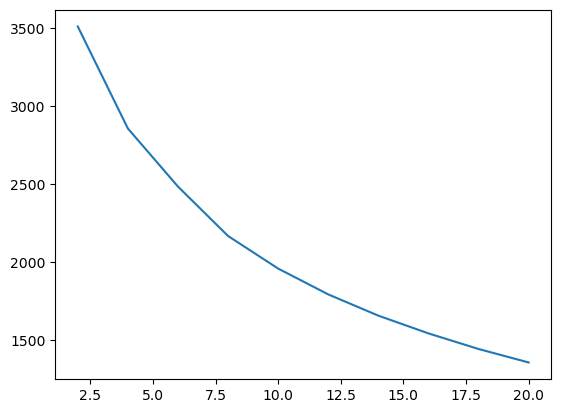

In [19]:
plt.plot(x,result)
plt.show